In [383]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [384]:
# Create Exclusive DataFrames
city = pd.read_csv('City.csv')
cab = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv('Transaction_ID.csv')

In [385]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [386]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [387]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [388]:
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Merge DataFrames to Create a Master Dataset

In [389]:
df1 = pd.merge(city, cab, on='City')

In [390]:
df2 = pd.merge(transactions,customer, on='Customer ID')

In [391]:
final_df = pd.merge(df1, df2, on = 'Transaction ID')

In [392]:
final_df

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,"8,405,837","302,149",10000139,42377,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,"8,405,837","302,149",10000140,42378,Pink Cab,25.30,407.21,255.5300,2060,Card,Male,18,8149
2,NEW YORK NY,"8,405,837","302,149",10000141,42375,Pink Cab,16.32,236.41,186.0480,1451,Card,Male,35,23989
3,NEW YORK NY,"8,405,837","302,149",10000142,42373,Pink Cab,12.43,194.61,144.1880,1609,Card,Male,30,23036
4,NEW YORK NY,"8,405,837","302,149",10000143,42378,Pink Cab,29.70,434.57,350.4600,2927,Cash,Male,33,14520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,"248,968","80,021",10437872,43104,Yellow Cab,1.96,26.23,25.1664,59926,Card,Female,59,4172
359388,BOSTON MA,"248,968","80,021",10437873,43105,Yellow Cab,23.52,380.22,338.6880,57905,Card,Male,60,31941
359389,BOSTON MA,"248,968","80,021",10437874,43106,Yellow Cab,29.10,393.33,391.1040,57906,Cash,Male,37,26410
359390,BOSTON MA,"248,968","80,021",10437875,43108,Yellow Cab,3.33,42.31,46.7532,59259,Cash,Male,51,15360


In [393]:
# Rearranging Columns
cab_industry = final_df[['Transaction ID','Customer ID','Company', 'City', 'Population',	'Users', 'Date of Travel',	'KM Travelled',	'Price Charged', 'Cost of Trip', 'Payment_Mode', 'Gender','Age', 'Income (USD/Month)']]
cab_industry

,Transaction ID,Customer ID,Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000139,2416,Pink Cab,NEW YORK NY,"8,405,837","302,149",42377,17.85,242.90,198.1350,Cash,Male,28,21399
1,10000140,2060,Pink Cab,NEW YORK NY,"8,405,837","302,149",42378,25.30,407.21,255.5300,Card,Male,18,8149
2,10000141,1451,Pink Cab,NEW YORK NY,"8,405,837","302,149",42375,16.32,236.41,186.0480,Card,Male,35,23989
3,10000142,1609,Pink Cab,NEW YORK NY,"8,405,837","302,149",42373,12.43,194.61,144.1880,Card,Male,30,23036
4,10000143,2927,Pink Cab,NEW YORK NY,"8,405,837","302,149",42378,29.70,434.57,350.4600,Cash,Male,33,14520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10437872,59926,Yellow Cab,BOSTON MA,"248,968","80,021",43104,1.96,26.23,25.1664,Card,Female,59,4172
359388,10437873,57905,Yellow Cab,BOSTON MA,"248,968","80,021",43105,23.52,380.22,338.6880,Card,Male,60,31941
359389,10437874,57906,Yellow Cab,BOSTON MA,"248,968","80,021",43106,29.10,393.33,391.1040,Cash,Male,37,26410
359390,10437875,59259,Yellow Cab,BOSTON MA,"248,968","80,021",43108,3.33,42.31,46.7532,Cash,Male,51,15360


Data Cleaning

In [394]:
cab_industry.isnull().sum()

Transaction ID        0
Customer ID           0
Company               0
City                  0
Population            0
Users                 0
Date of Travel        0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [395]:
cab_industry.duplicated().sum()

0

In [396]:
cab_industry.dtypes

Transaction ID          int64
Customer ID             int64
Company                object
City                   object
Population             object
Users                  object
Date of Travel          int64
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [397]:
cab_industry['Population'] = cab_industry['Population'].str.replace(',', '')
cab_industry['Users'] = cab_industry['Users'].str.replace(',', '')

In [398]:
cab_industry['Population'] = cab_industry['Population'].astype('int64')
cab_industry['Users'] = cab_industry['Users'].astype('int64')
cab_industry[['Transaction ID','Customer ID']] = cab_industry[['Transaction ID','Customer ID']].astype('object')

In [399]:
def date_conversion(date):
    start_date = datetime(1899, 12, 30)
    return start_date + timedelta(days=date)

cab_industry['Date of Travel'] = cab_industry['Date of Travel'].apply(date_conversion)

In [400]:
cab_industry.head(5)

,Transaction ID,Customer ID,Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000139,2416,Pink Cab,NEW YORK NY,8405837,302149,2016-01-08,17.85,242.90,198.135,Cash,Male,28,21399
1,10000140,2060,Pink Cab,NEW YORK NY,8405837,302149,2016-01-09,25.30,407.21,255.530,Card,Male,18,8149
2,10000141,1451,Pink Cab,NEW YORK NY,8405837,302149,2016-01-06,16.32,236.41,186.048,Card,Male,35,23989
3,10000142,1609,Pink Cab,NEW YORK NY,8405837,302149,2016-01-04,12.43,194.61,144.188,Card,Male,30,23036
4,10000143,2927,Pink Cab,NEW YORK NY,8405837,302149,2016-01-09,29.70,434.57,350.460,Cash,Male,33,14520


Exploratory Data Analysis (EDA)

Hypotheses

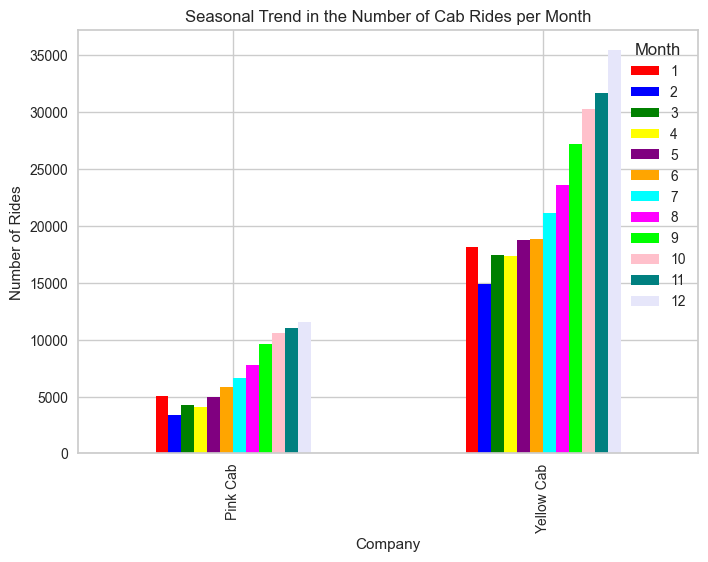

In [421]:
cab_industry.groupby(['Company', pd.to_datetime(cab_industry['Date of Travel']).dt.month])['Transaction ID'].count().unstack().plot(kind='bar',color=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender'])
plt.title('Seasonal Trend in the Number of Cab Rides per Month')
plt.ylabel('Number of Rides')
plt.xlabel('Company')
plt.legend(title='Month')
plt.show()

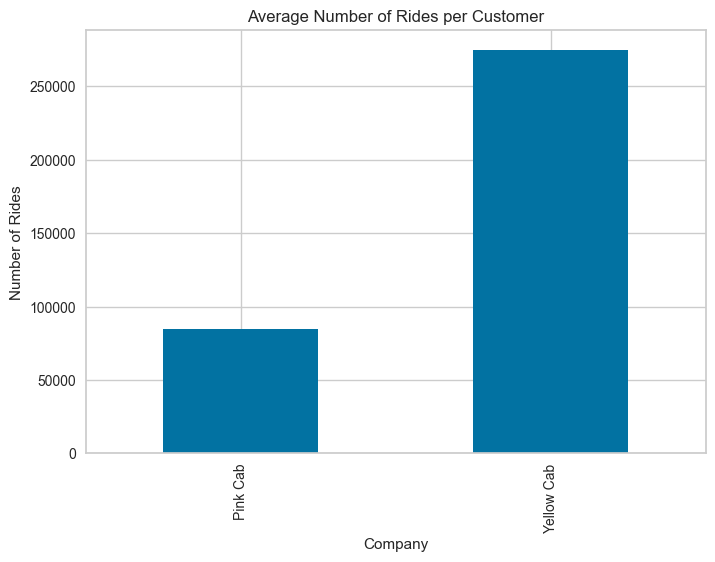

In [403]:
cab_industry.groupby('Company')['Transaction ID'].count().plot(kind='bar')
plt.title('Average Number of Rides per Customer')
plt.ylabel('Number of Rides')
plt.xlabel('Company')
plt.show()

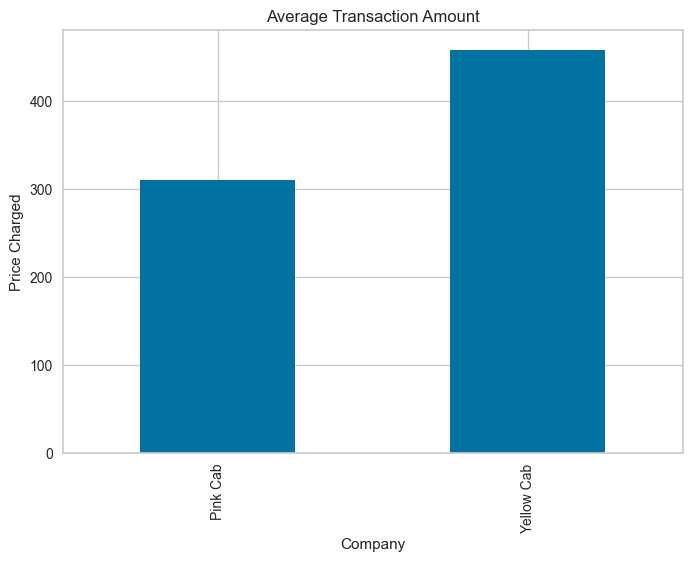

In [404]:
cab_industry.groupby('Company')['Price Charged'].mean().plot(kind='bar')
plt.title('Average Transaction Amount')
plt.ylabel('Price Charged')
plt.xlabel('Company')
plt.show()

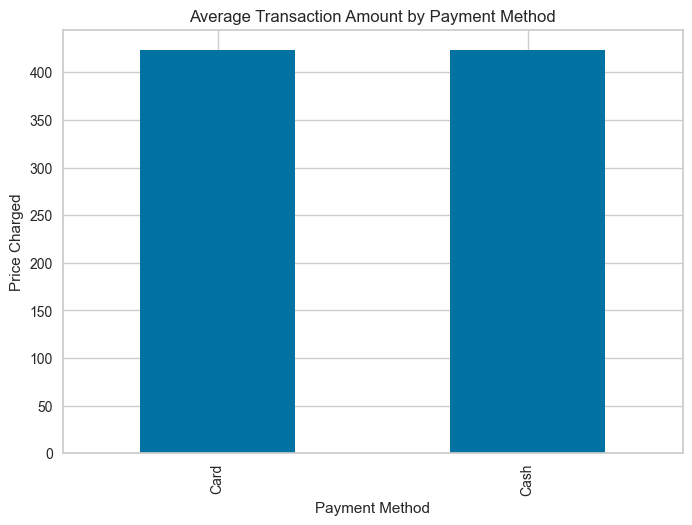

In [405]:
cab_industry.groupby('Payment_Mode')['Price Charged'].mean().plot(kind='bar')
plt.title('Average Transaction Amount by Payment Method')
plt.ylabel('Price Charged')
plt.xlabel('Payment Method')
plt.show()

Text(0.5, 1.0, 'Average Number of Rides')

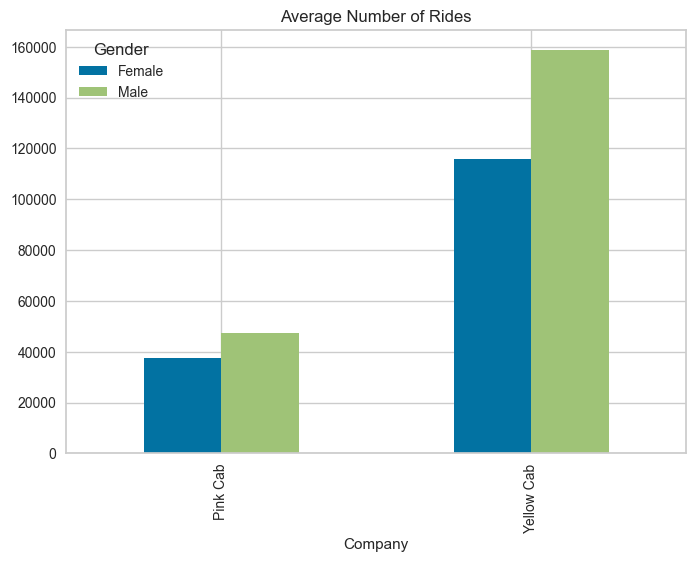

In [406]:
cab_industry.groupby(['Company', 'Gender'])['Transaction ID'].count().unstack().plot(kind='bar')
plt.title('Average Number of Rides')